### House Prices - Advanced Regression Techniques

This project is for Kaggle data science competition.
The goal here is to predict the sales price for each house by building a model using training data. 
I am going to visualize data table to understand distribution, trend, any correlation, and abnormalities using matplotlib/seaborn. I will clean the data if necessary for more accurate prediction. Then I will build a model to test price of each house in test dataset. Models are evaluated based on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import piplite
# await piplite.install('seaborn') 
## this is only for jupyter online

In [3]:
import seaborn as sns

In [4]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Importing/Understanding Datasets

In [5]:
housing_index = pd.read_csv('/Users/jihyeson/Desktop/data science projects/housing_prediction/train.csv')
# housing_index = pd.read_csv('train.csv')


In [6]:
# housing_test = pd.read_csv('test.csv')
# housing_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
# housing_test.drop(['GarageYrBlt','1stFlrSF','GrLivArea'],axis=1,inplace=True)
# housing_test.head(3)

In [7]:
housing_index.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Since I cannot see all the columns from current display, I will add change display option to show all the columns.

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
print ("Total rows: ", housing_index.shape[0])
print ("Total columns: ", housing_index.shape[1])

Total rows:  1460
Total columns:  81


I will check number of values and the data type for each column:

In [10]:
housing_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Below items do not have enough samples. For example, PoolQc has only 7 values out of 1460, which is almost 0%. If we use these values it will misrepresent, therefore I will remove columns that have too many not null values:
- Alley   
- PoolQC  
- Fence 
- MiscFeature

In [11]:
housing_index.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

Now if we check column, these 3 columns will be deleted as in below.

In [12]:
housing_index.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [13]:
housing_index.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Since ID is equivalent to index, will set it as index.

In [14]:
housing_index =housing_index.set_index('Id')

In [15]:
housing_index.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


### Exploratory data analysis

In [16]:
summary_sub = housing_index.groupby('MSSubClass')['SalePrice'].agg(['count',np.mean,min,max])
summary_sub.sort_values(['mean'])

,count,mean,min,max
MSSubClass,,,,
30,69,95829.724638,34900,163500
180,10,102300.000000,75500,148000
45,12,108591.666667,76000,139400
190,30,129613.333333,55000,228950
90,52,133541.076923,82000,206300
160,63,138647.380952,75000,239000
50,144,143302.972222,37900,410000
85,20,147810.000000,123000,198500
40,4,156125.000000,79500,260000


In [17]:
summary_sub['gab'] = summary_sub['max'] - summary_sub['min']
summary_sub.sort_values(['gab'])

,count,mean,min,max,gab
MSSubClass,,,,,
45,12,108591.666667,76000,139400,63400
180,10,102300.000000,75500,148000,72500
85,20,147810.000000,123000,198500,75500
90,52,133541.076923,82000,206300,124300
30,69,95829.724638,34900,163500,128600
160,63,138647.380952,75000,239000,164000
190,30,129613.333333,55000,228950,173950
40,4,156125.000000,79500,260000,180500
80,58,169736.551724,107000,345000,238000


In [18]:
summary_sub.index.values

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190])

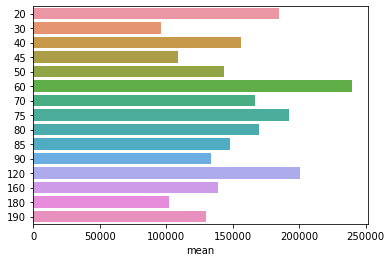

In [19]:
g = sns.barplot(x='mean',y=summary_sub.index.values.astype(str), data = summary_sub)
plt.show(g)

Top 3 average sale price based on type of dwelling:
- 60: 2-STORY 1946 & NEWER
- 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 75: 2-1/2 STORY ALL AGES



In [20]:
summary_zon = housing_index.groupby('MSZoning')['SalePrice'].agg(['count',np.mean,min,max])
summary_zon

,count,mean,min,max
MSZoning,,,,
C (all),10,74528.000000,34900,133900
FV,65,214014.061538,144152,370878
RH,16,131558.375000,76000,200000
RL,1151,191004.994787,39300,755000
RM,218,126316.830275,37900,475000


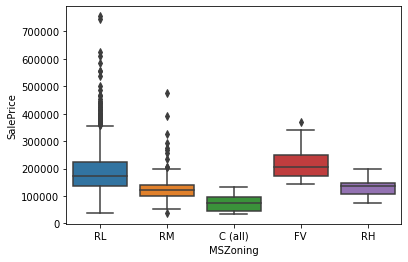

In [21]:
sns.boxplot(x='MSZoning', y='SalePrice', data = housing_index);

Top 3 average sales price based on zoning:
- FV :Floating Village Residential
- RL :Residential Low Density
- RH :Residential High Density

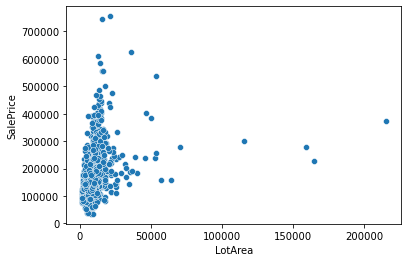

In [22]:
sns.scatterplot(x='LotArea',y='SalePrice',data=housing_index)
plt.show() 

There are not many sample for lot Area above 50,000, so I will cut off Lot area by 50,000 and see if there is any relationship.

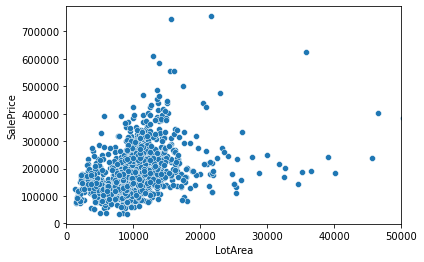

In [23]:
sns.scatterplot(x='LotArea',y='SalePrice',data=housing_index)
plt.xlim(0, 50000)
plt.show() 

Even though I have set a limit for x to 50,000, there seems no relationship between lot area and sale price from simple scatter plot.

In [24]:
summary_st = housing_index.groupby('Street')['SalePrice'].agg(['count',np.mean,min,max])
summary_st

,count,mean,min,max
Street,,,,
Grvl,6,130190.500000,55993,228950
Pave,1454,181130.538514,34900,755000


Based on type of road access to property (Gravel vs Paved)
- mean sales price were higher for paved road
- higher % type of road was paved as well. 


In [25]:
summary_lshape = housing_index.groupby('LotShape')['SalePrice'].agg(['count',np.mean,min,max])
summary_lshape

,count,mean,min,max
LotShape,,,,
IR1,484,206101.665289,52000,755000
IR2,41,239833.365854,110000,538000
IR3,10,216036.500000,73000,375000
Reg,925,164754.818378,34900,582933


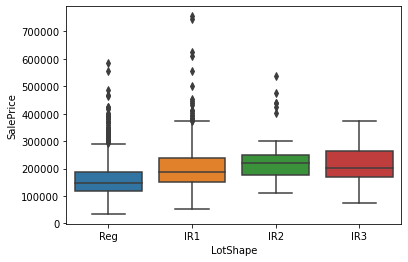

In [26]:
sns.boxplot(x='LotShape', y='SalePrice', data = housing_index);

Mean sale price is increasing with irregularity. From the boxplot, it seems like the irregularity in the general shape of property adds premium to the housing sale price.

In [27]:
summary_landcontour = housing_index.groupby('LandContour')['SalePrice'].agg(['count',np.mean,min,max])
summary_landcontour

,count,mean,min,max
LandContour,,,,
Bnk,63,143104.079365,52500,315000
HLS,50,231533.940000,82500,538000
Low,36,203661.111111,39300,385000
Lvl,1311,180183.746758,34900,755000


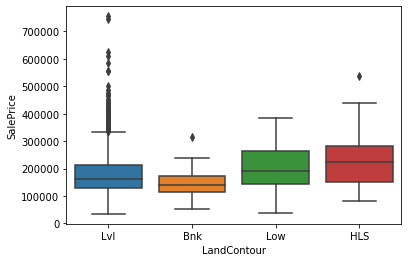

In [28]:

sns.boxplot(x='LandContour', y='SalePrice', data = housing_index);

There are many extreme cases for sale price above >300,000 for house that is near flat level, however, that is because there are not many houses that are non-flat level.

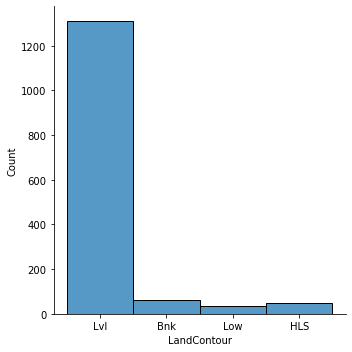

In [29]:
sns.displot(housing_index['LandContour'])

In [30]:
housing_index.groupby('Utilities')['SalePrice'].agg(['count',np.mean,min,max])

,count,mean,min,max
Utilities,,,,
AllPub,1459,180950.95682,34900,755000
NoSeWa,1,137500.00000,137500,137500


Most of houses in training set are available for all public utilities

   AllPub: All public Utilities (E,G,W,& S)	
   NoSeWa: Electricity and Gas Only

In [31]:
housing_index.groupby('LotConfig')['SalePrice'].agg(['count',np.mean,min,max])

,count,mean,min,max
LotConfig,,,,
Corner,263,181623.425856,52500,755000
CulDSac,94,223854.617021,84000,625000
FR2,47,177934.574468,81000,394617
FR3,4,208475.000000,128000,315000
Inside,1052,176938.047529,34900,611657


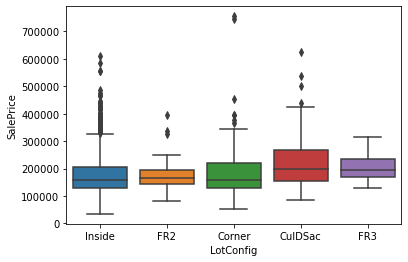

In [32]:

sns.boxplot(x='LotConfig', y='SalePrice', data = housing_index);

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property


Inside lot is the most common type



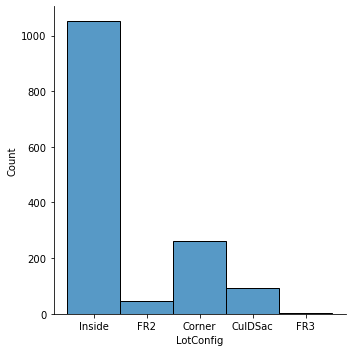

In [33]:

sns.displot(housing_index['LotConfig']);

In [34]:
summary_lslope = housing_index.groupby('LandSlope')['SalePrice'].agg(['count',np.mean,min,max])
summary_lslope

,count,mean,min,max
LandSlope,,,,
Gtl,1382,179956.799566,34900,755000
Mod,65,196734.138462,39300,538000
Sev,13,204379.230769,61000,375000


In [35]:
summary_lslope.axes

[Index(['Gtl', 'Mod', 'Sev'], dtype='object', name='LandSlope'),
 Index(['count', 'mean', 'min', 'max'], dtype='object')]

In [36]:
summary_lslope.index.values

array(['Gtl', 'Mod', 'Sev'], dtype=object)

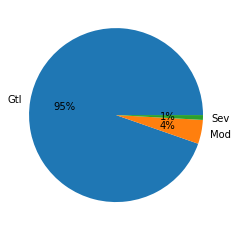

In [37]:
plt.pie(summary_lslope['count'],labels=summary_lslope.index.values, autopct='%.0f%%');

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope


In [38]:
summary_nb = housing_index.groupby('Neighborhood')['SalePrice'].agg(['count',np.mean,min,max])
summary_nb

,count,mean,min,max
Neighborhood,,,,
Blmngtn,17,194870.882353,159895,264561
Blueste,2,137500.000000,124000,151000
BrDale,16,104493.750000,83000,125000
BrkSide,58,124834.051724,39300,223500
ClearCr,28,212565.428571,130000,328000
CollgCr,150,197965.773333,110000,424870
Crawfor,51,210624.725490,90350,392500
Edwards,100,128219.700000,58500,320000
Gilbert,79,192854.506329,141000,377500


In [39]:
summary_nb.axes

[Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
        'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
       dtype='object', name='Neighborhood'),
 Index(['count', 'mean', 'min', 'max'], dtype='object')]

<AxesSubplot:xlabel='mean'>

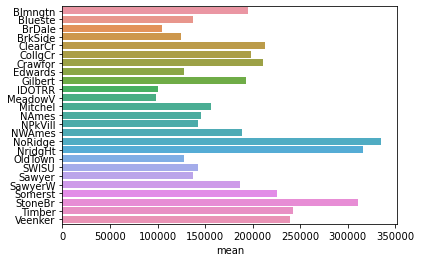

In [40]:
sns.barplot(x='mean',y=summary_nb.index.values, data = summary_nb)

In [41]:
summary_hs = housing_index.groupby('HouseStyle')['SalePrice'].agg(['count',np.mean,min,max])
summary_hs

,count,mean,min,max
HouseStyle,,,,
1.5Fin,154,143116.740260,37900,410000
1.5Unf,14,110150.000000,76000,139400
1Story,726,175985.477961,34900,611657
2.5Fin,8,220000.000000,104000,475000
2.5Unf,11,157354.545455,101000,325000
2Story,445,210051.764045,40000,755000
SFoyer,37,135074.486486,75500,206300
SLvl,65,166703.384615,91000,345000


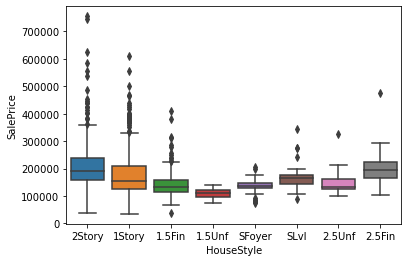

In [42]:
sns.boxplot(x='HouseStyle', y ='SalePrice',data = housing_index);

In [43]:
yearly_price = housing_index.groupby('YrSold')['SalePrice'].agg(np.mean)
yearly_price

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [44]:
yearly_price.axes

[Int64Index([2006, 2007, 2008, 2009, 2010], dtype='int64', name='YrSold')]

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

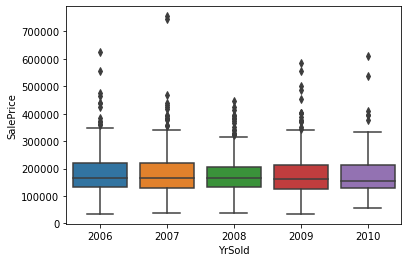

In [45]:
sns.boxplot(data=housing_index, x="YrSold", y="SalePrice")

Average sale price seems stable for 5 years 

In [46]:
housing_index.groupby(['Condition1','Condition2'])['SalePrice'].agg('count')

Condition1  Condition2
Artery      Artery           2
            Norm            45
            PosA             1
Feedr       Feedr            1
            Norm            76
            RRAe             1
            RRAn             1
            RRNn             2
Norm        Norm          1260
PosA        Norm             8
PosN        Norm            17
            PosN             2
RRAe        Norm            11
RRAn        Feedr            4
            Norm            22
RRNe        Norm             2
RRNn        Feedr            1
            Norm             4
Name: SalePrice, dtype: int64

Norm/Norm is the most common type of the dataset

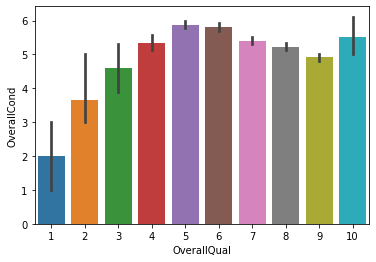

In [47]:
sns.barplot(x='OverallQual', y='OverallCond', data=housing_index);

Better overall condition does not necessarily mean better overall quality.

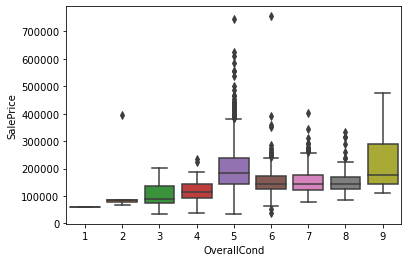

In [48]:
sns.boxplot(x='OverallCond', y='SalePrice', data=housing_index);

Highest average sale price in overall condition score of 5; this may be due to higher sample size and more extreme cases in overall condition 5.

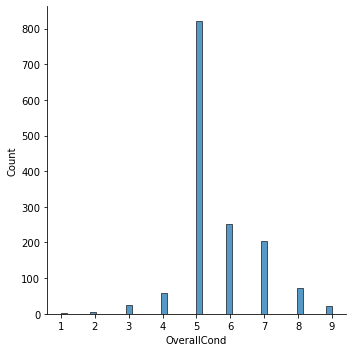

In [49]:
sns.displot(housing_index['OverallCond']);

sale price by the year of the house built: 
 - shows upward trend after 1940

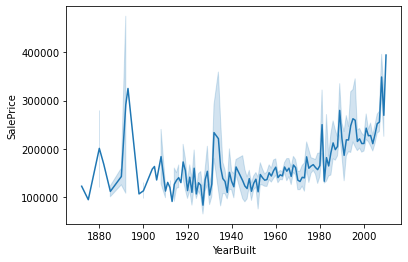

In [50]:
sns.lineplot(x='YearBuilt', y= 'SalePrice', data=housing_index);

#### Correlation analysis

In [51]:
housing_corr = housing_index.corr()
housing_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


I will visualize the correlation using heatmap.


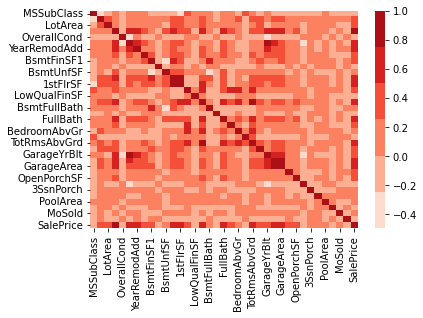

In [52]:
sns.heatmap(housing_index.corr(), cmap=sns.color_palette("Reds"));

Check variables that show high correlation (I assume correlation >0.7 is an indication of high correlation)

In [53]:
housing_corr[(housing_corr>0.7) & (housing_corr!=1.0)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It shows strong relationships between
- years built & garage years built
- total basement square feet & 1st floor square feet
- above grade living area square feet & Total rooms above grade 

I will delete one of columns to avoid multicollinearity 

In [54]:
housing_index.drop(['GarageYrBlt','1stFlrSF','GrLivArea'],axis=1,inplace=True)
housing_index.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


### Preprocessing

Before selecting and training model, I have to handle Null values. I erased few columns that have no enough values to be evaluated, however, still have 2 columns that have missing data. These column's missing values represent <20% of total data, I will replace the missing value with mean value. 

In [55]:
housing_index['LotFrontage'] = housing_index['LotFrontage'].fillna(housing_index['LotFrontage'].mean())
housing_index['MasVnrArea'] = housing_index['MasVnrArea'].fillna(housing_index['MasVnrArea'].mean())

Now, I have to convert non-numerical column to numerical column for the analysis.

In [56]:
housing_index.columns[housing_index.dtypes=='object']

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
housing_index[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']] = housing_index[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']].apply(LabelEncoder().fit_transform)
housing_index.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,854,0,1,0,2,1,3,1,2,8,6,0,5,1,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,0,0,0,1,2,0,3,1,3,6,6,1,4,1,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500


In [59]:
# housing_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
#        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
#        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']] = housing_index[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
#        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
#        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']].apply(LabelEncoder().fit_transform)
#  housing_test.head(2)

In [60]:
# X_test = housing_test.loc[:, housing_test.columns != 'SalePrice']
# X_test.head(3)

In [61]:
# y_test= housing_test.iloc[:,-1]
# y_test.head(3)

### Training/Test Data Split

I have seperate training/test data. However I will use train_test_split function to divide the training set into training data set and validation data set. 

In [62]:
X, y = housing_index.iloc[:, :-1].values, housing_index.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

In [63]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model selection

#### Linear regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regr = LinearRegression().fit(X_train,y_train)

In [66]:
y_pred = regr.predict(X_test)

In [67]:
print('Training accuracy:', regr.score(X_train, y_train))
print('Test accuracy:', regr.score(X_test, y_test))

Training accuracy: 0.8726057338548748
Test accuracy: 0.6494029475008047


In [68]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[166438.09779466 177500.        ]
 [ 90790.09779466 103200.        ]
 [ 97014.09779466  79900.        ]
 [296814.09779466 310000.        ]
 [145638.09779466 129900.        ]
 [155036.09779466 149500.        ]
 [255182.09779466 219500.        ]
 [140972.09779466 139000.        ]
 [282038.09779466 239686.        ]
 [188294.09779466 176000.        ]
 [ 59500.09779466  64500.        ]
 [309006.09779466 302000.        ]
 [169286.09779466 174500.        ]
 [135910.09779466 156000.        ]
 [187997.09779466 187000.        ]
 [ 96678.09779466  93000.        ]
 [263670.09779466 235000.        ]
 [292790.09779466 335000.        ]
 [125542.09779466 127500.        ]
 [227478.09779466 215000.        ]
 [297430.09779466 285000.        ]
 [275742.09779466 324000.        ]
 [268918.09779466 250000.        ]
 [157286.09779466 112000.        ]
 [217846.09779466 201000.        ]
 [ 94296.09779466 140000.        ]
 [153547.09779466 151000.        ]
 [157846.09779466 176000.        ]
 [331446.09779466 31

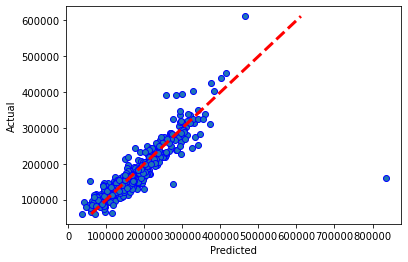

In [69]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [70]:
from sklearn import metrics

In [71]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 21572.2079732974
MSE is 1805260184.8076198
R2 score is 0.6494029475008047


#### Ridge Regression

In [73]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=0.5, random_state=100)
rdg.fit(X_train, y_train)

print('training score: ',rdg.score(X_train,y_train))
print('test score: ',rdg.score(X_test,y_test))

training score:  0.8726021033195964
test score:  0.6497253246233097


In [74]:
y_pred_rdg = rdg.predict(X_test)

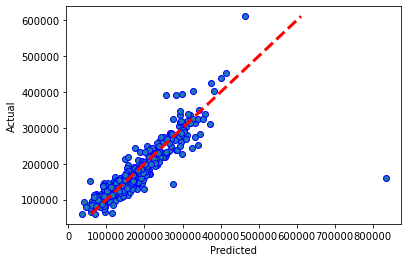

In [75]:
fig, ax = plt.subplots()
ax.scatter(y_pred_rdg, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [76]:
mae_rdg = metrics.mean_absolute_error(y_test, y_pred_rdg)
mse_rdg = metrics.mean_squared_error(y_test, y_pred_rdg)
r2_rdg = metrics.r2_score(y_test, y_pred_rdg)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_rdg))
print('MSE is {}'.format(mse_rdg))
print('R2 score is {}'.format(r2_rdg))

The model performance for testing set
--------------------------------------
MAE is 21567.0172978281
MSE is 1803600231.936931
R2 score is 0.6497253246233097


#### LASSO

In [77]:
from sklearn import linear_model
Lreg = linear_model.Lasso(alpha=0.5)
Lreg.fit(X_train, y_train)

Lasso(alpha=0.5)

In [78]:
print('training score: ',Lreg.score(X_train,y_train))
print('test score: ',Lreg.score(X_test,y_test))

training score:  0.8726022245240136
test score:  0.6494296152042325


In [79]:
y_pred_lreg = Lreg.predict(X_test)

In [80]:
mae_lreg = metrics.mean_absolute_error(y_test, y_pred_lreg)
mse_lreg = metrics.mean_squared_error(y_test, y_pred_lreg)
r2_lreg = metrics.r2_score(y_test, y_pred_lreg)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_lreg))
print('MSE is {}'.format(mse_lreg))
print('R2 score is {}'.format(r2_lreg))

The model performance for testing set
--------------------------------------
MAE is 21572.134355082275
MSE is 1805122870.067307
R2 score is 0.6494296152042325


#### Decision Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3,random_state=100)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=100)

In [82]:
print('training score: ',tree.score(X_train,y_train))
print('test score: ',tree.score(X_test,y_test))

training score:  0.7562177373614908
test score:  0.6326915323109357


In [83]:
y_pred_dtree = tree.predict(X_test)

In [84]:
mae_dtree= metrics.mean_absolute_error(y_test, y_pred_dtree)
mse_dtree = metrics.mean_squared_error(y_test, y_pred_dtree)
r2_dtree = metrics.r2_score(y_test, y_pred_dtree)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_dtree))
print('MSE is {}'.format(mse_dtree))
print('R2 score is {}'.format(r2_dtree))

The model performance for testing set
--------------------------------------
MAE is 32095.277803992743
MSE is 1891308975.745841
R2 score is 0.6326915323109357


#### Comparision

In [89]:
compare_model = pd.DataFrame(np.array([[regr.score(X_train, y_train),
                                       rdg.score(X_train, y_train),
                                       Lreg.score(X_train, y_train),
                                       tree.score(X_train,y_train)],
                                       [regr.score(X_test, y_test),
                                       rdg.score(X_test, y_test),
                                       Lreg.score(X_test, y_test),
                                       tree.score(X_test, y_test)],
                                       [mae,
                                        mae_rdg,
                                        mae_lreg,
                                       mae_dtree],
                                       [mse,
                                       mse_rdg,
                                       mse_lreg,
                                       mse_dtree]]),
                             columns=['Linear_Regression','Ridge_Regression','LASSO','Decision Tree'],
                             index=['Test score','Train score','MAE','MSE'])
compare_model.style.format("{:.4f}")

,Linear_Regression,Ridge_Regression,LASSO,Decision Tree
Test score,0.8726,0.8726,0.8726,0.7562
Train score,0.6494,0.6497,0.6494,0.6327
MAE,21572.2080,21567.0173,21572.1344,32095.2778
MSE,1805260184.8076,1803600231.9369,1805122870.0673,1891308975.7458
